In [1]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [2]:
import torch

print(f"PyTorch version: {torch.__version__}")

# Check PyTorch has access to MPS (Metal Performance Shader, Apple's GPU architecture)
print(f"Is MPS (Metal Performance Shader) built? {torch.backends.mps.is_built()}")
print(f"Is MPS available? {torch.backends.mps.is_available()}")

# Set the device
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

PyTorch version: 2.1.0
Is MPS (Metal Performance Shader) built? True
Is MPS available? True
Using device: mps


In [3]:
import os

HOME = os.getcwd()
print(HOME)

/Users/daniel.kaldheim/Projects/Crudus Heima/shop-price-tag


In [15]:
!pip install -q easyocr
!pip install -q roboflow
!pip install -q ultralytics
!pip install -q python-dotenv

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/a8/97/d6d2592ba629ab41e18aaba14a4d75a5b56c40398a1c0b9e5979317798d0/ultralytics-8.0.196-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 16.5 MB/s eta 0:00:00m eta 0:00:01
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.195
    Uninstalling ultralytics-8.0.195:
      Successfully uninstalled ultralytics-8.0.195


In [4]:
%load_ext dotenv
%dotenv

In [5]:
from dotenv import dotenv_values

config = dotenv_values(".env")

In [7]:
from roboflow import Roboflow

rf = Roboflow(api_key=config["ROBOFLOW_API_KEY"])
project = rf.workspace("daniel-kaldheim-4f58q").project("price-tags-c79pp")
dataset = project.version(4).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.196, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Price-tags-3 in yolov8:: 100%|██████████| 2136/2136 [00:00<00:00, 7767.64it/s]


In [8]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")

# Train the model

results = model.train(
    data=HOME + "/Price-tags-3/data.yaml", epochs=100, imgsz=640, device=device
)

Ultralytics YOLOv8.0.196 🚀 Python-3.11.0 torch-2.1.0 MPS (Apple M2 Max)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/daniel.kaldheim/Projects/Crudus Heima/shop-price-tag/Price-tags-3/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True


0: 480x640 6 price-tags, 46.8ms
Speed: 2.3ms preprocess, 46.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


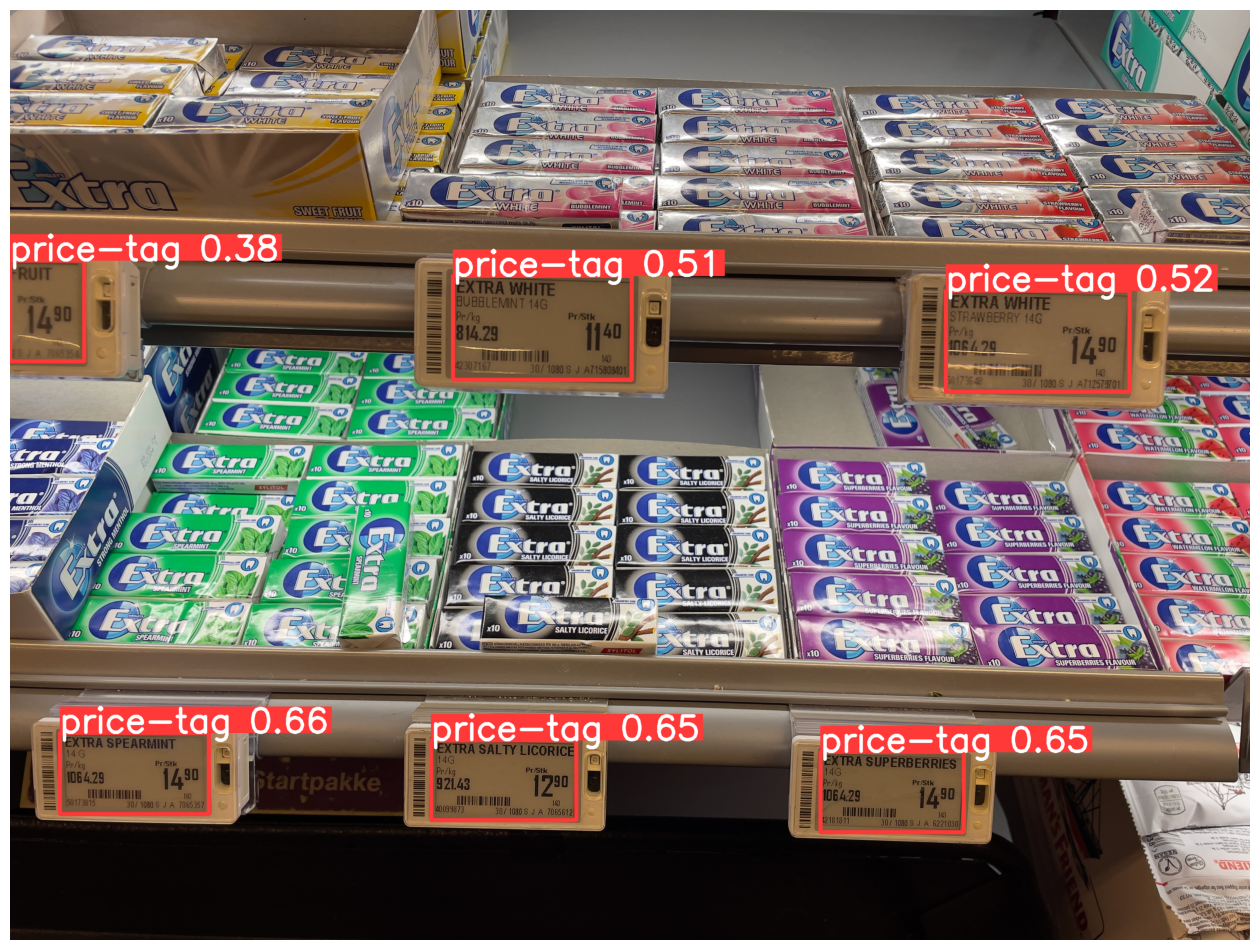

In [5]:
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import supervision as sv

# Load a model
# model = YOLO('yolov8n.pt')  # load an official model
model = YOLO("runs/detect/train7/weights/best.pt")  # load a custom model

IMAGE_NAME = "IMG_4270.jpeg"
IMAGE_PATH = os.path.join(HOME, IMAGE_NAME)
cv_image = cv2.imread(IMAGE_PATH)

# Predict with the model
# results = model('Price-tags-2/valid/images/IMG_0734_jpeg.rf.5f7c304d33522c57f8d8a06c9ba8a062.jpg')  # predict on an image
results = model(cv_image)  # predict on an image

for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.save("results.jpg")  # save image
    sv.plot_image(im_array, (16, 16))


0: 480x640 6 price-tags, 42.6ms
Speed: 2.5ms preprocess, 42.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


[      162.2        2350       646.4      2614.4]


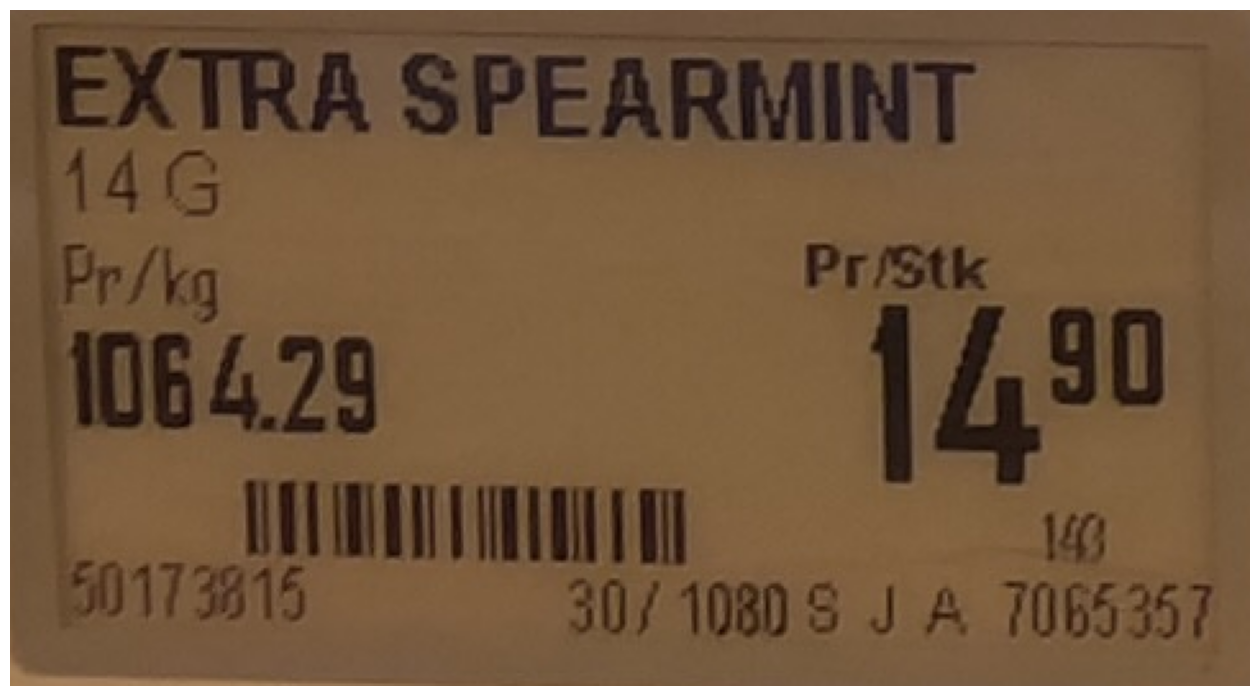

[     1369.4      2374.1      1841.8      2634.1]


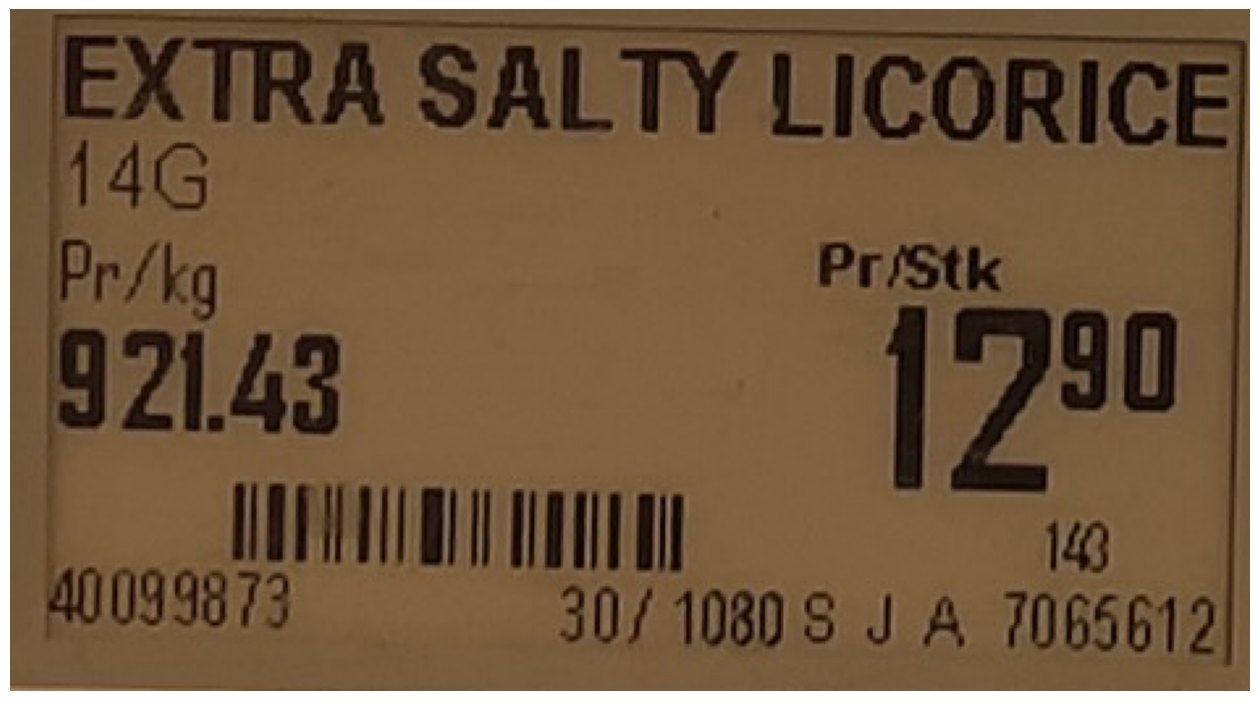

[     2635.4      2412.8      3101.2      2673.3]


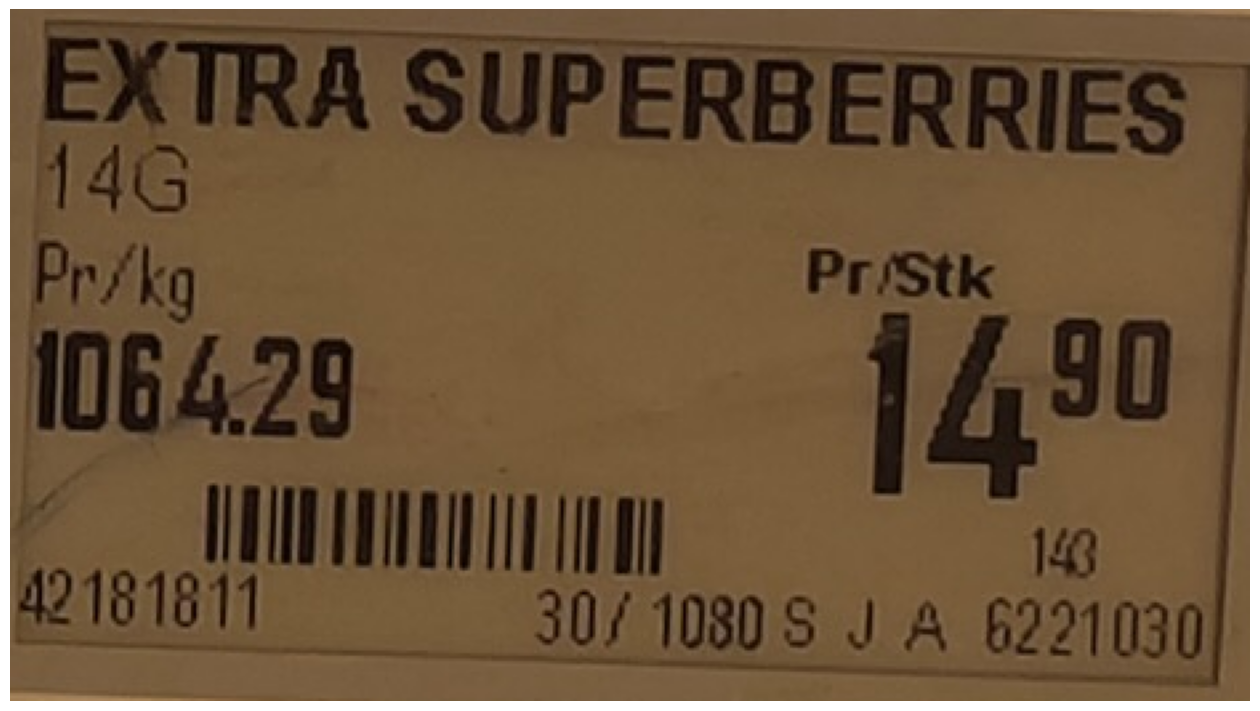

[     3043.4      912.66      3640.1      1241.8]


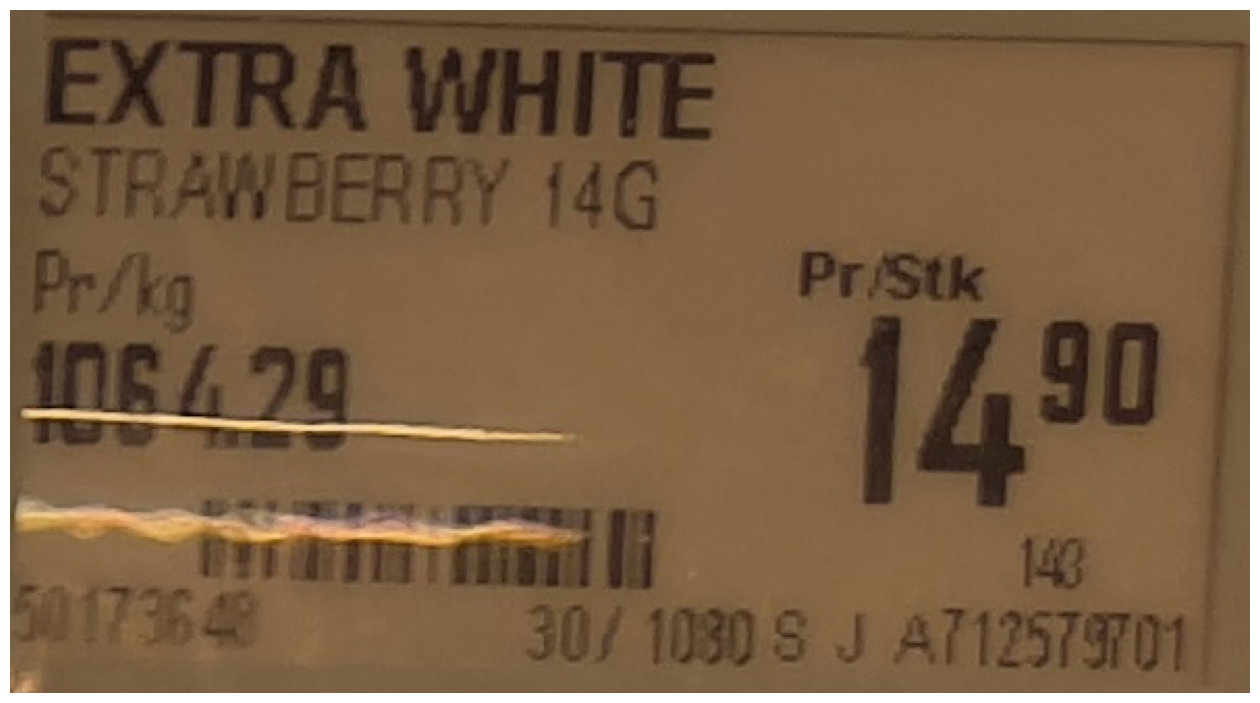

[     1440.7      864.56      2021.8      1202.8]


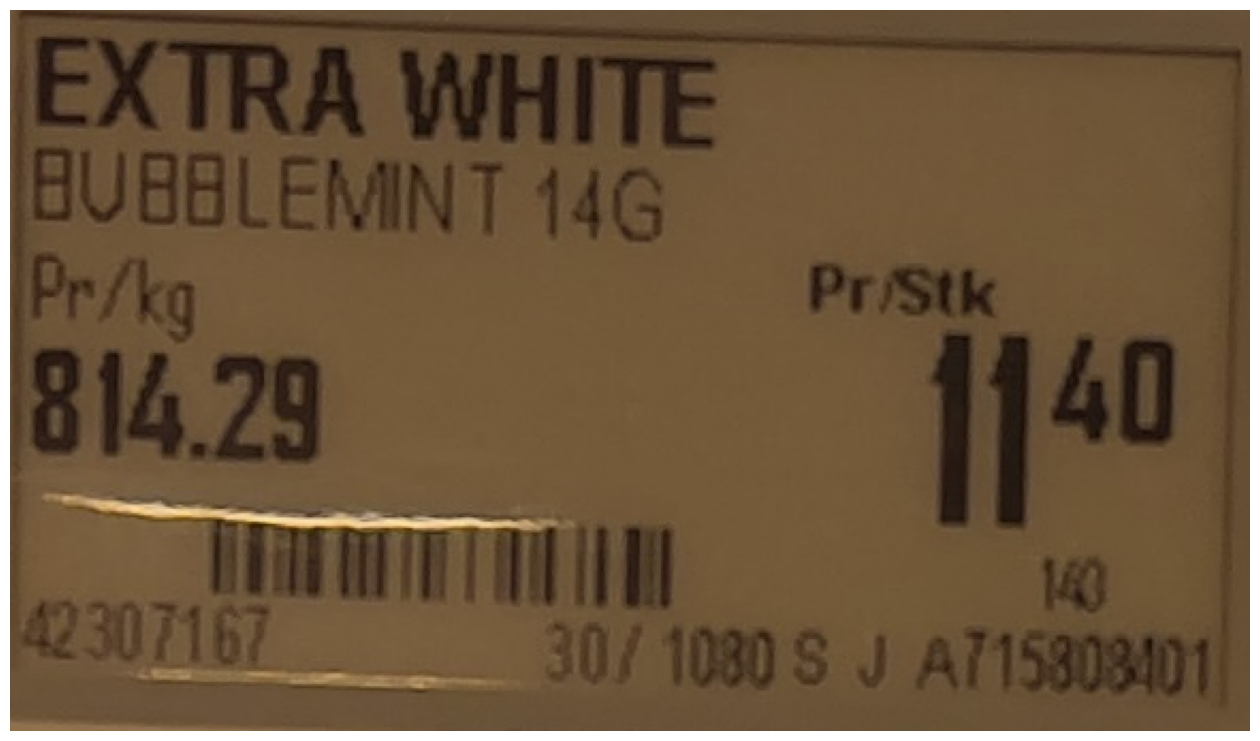

[    0.67335      814.69      241.76      1142.7]


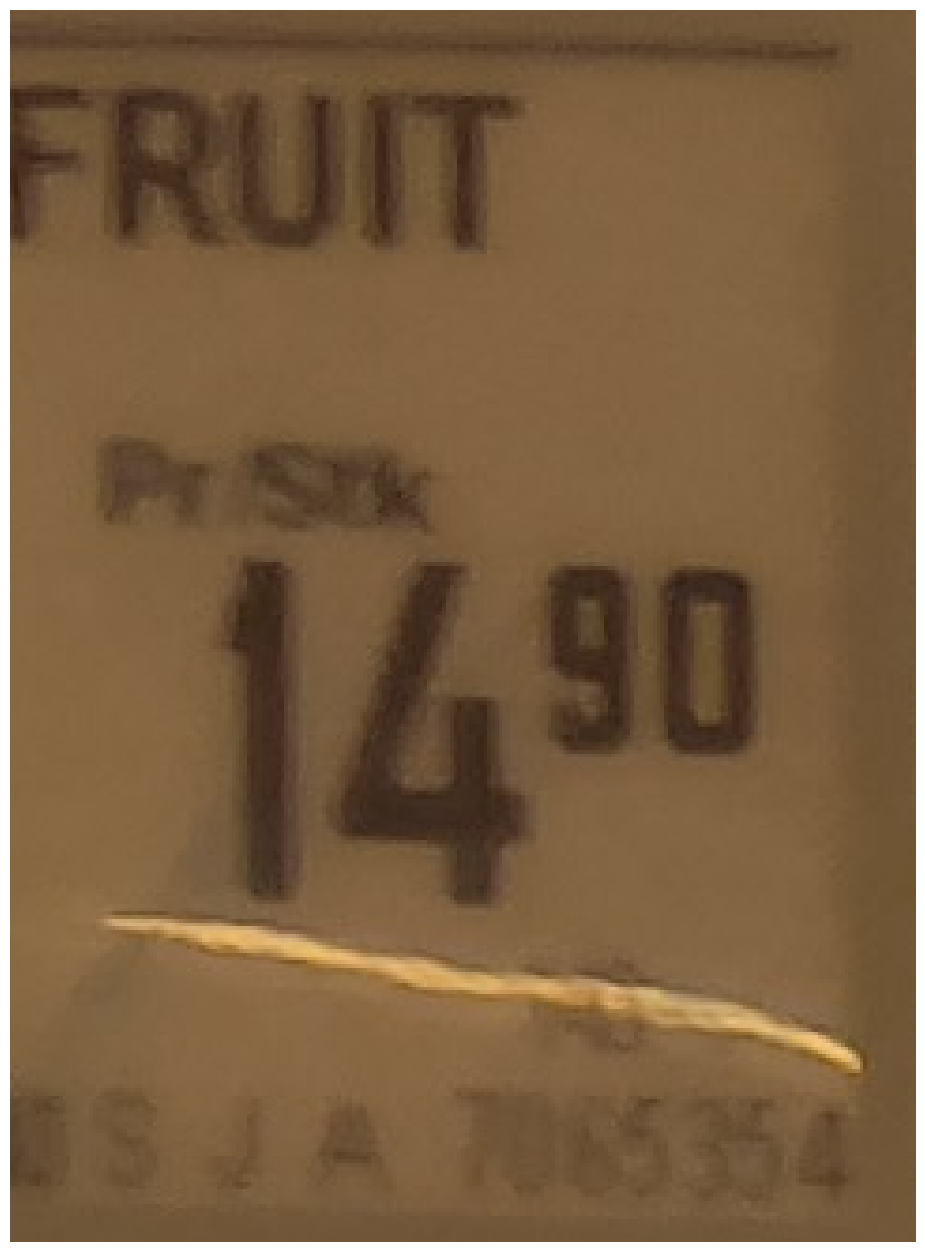

In [15]:
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import supervision as sv

# Load a model
# model = YOLO('yolov8n.pt')  # load an official model
model = YOLO("runs/detect/train7/weights/best.pt")  # load a custom model

IMAGE_NAME = "IMG_4270.jpeg"
IMAGE_PATH = os.path.join(HOME, IMAGE_NAME)
cv_image = cv2.imread(IMAGE_PATH)

# Predict with the model
# results = model('Price-tags-2/valid/images/IMG_0734_jpeg.rf.5f7c304d33522c57f8d8a06c9ba8a062.jpg')  # predict on an image
results = model(cv_image)  # predict on an image

for r in results:
    for dim in r.boxes.xyxy.numpy():
        print(dim)
        x, y, x1, y1 = dim
        image = cv_image[round(y) : round(y1), round(x) : round(x1)]

        sv.plot_image(image, (16, 16))

In [11]:
from ultralytics import YOLO

# Load a model
model = YOLO("runs/detect/train7/weights/best.pt")  # load a custom model

model.export(format="tflite")

Error: Unable to infer type of dictionary: Cannot infer concrete type of torch.nn.Module

In [13]:
!yolo mode=export model="runs/detect/train7/weights/best.pt" format=torchscript optimize


Ultralytics YOLOv8.0.196 🚀 Python-3.11.0 torch-2.1.0 CPU (Apple M2 Max)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train7/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)

TorchScript: starting export with torch 2.1.0...
TorchScript: optimizing for mobile...
TorchScript: export success ✅ 1.0s, saved as 'runs/detect/train7/weights/best.torchscript' (11.6 MB)

Export complete (1.5s)
Results saved to /Users/daniel.kaldheim/Projects/Crudus Heima/shop-price-tag/runs/detect/train7/weights
Predict:         yolo predict task=detect model=runs/detect/train7/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train7/weights/best.torchscript imgsz=640 data=/Users/daniel.kaldheim/Projects/Crudus Heima/shop-price-tag/Price-tags-3/data.yaml  
Visualize:       https://netron.app
💡 Learn more at https://docs.ultralytics.com/modes/export
